#### Université Paul Sabatier, M2 SID
# Machine learning - Practical kernel PCA


In [1]:

%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np
import scipy.misc
import scipy as sp
import numpy.random as npr
import sklearn as sk
from sklearn import neighbors
from sklearn import model_selection
from sklearn import decomposition
import string
import random



## Question 1: a toy example
Perform kernel PCA on the following dataset. Display points with given colours. Use [decomposition.KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) from `sklearn`. Try different [kernels](https://scikit-learn.org/stable/modules/metrics.html#metrics) and hyperparameters, comment on the results. What happens with `kernel = "linear"`.

Text(0.5, 1.0, 'Dataset')

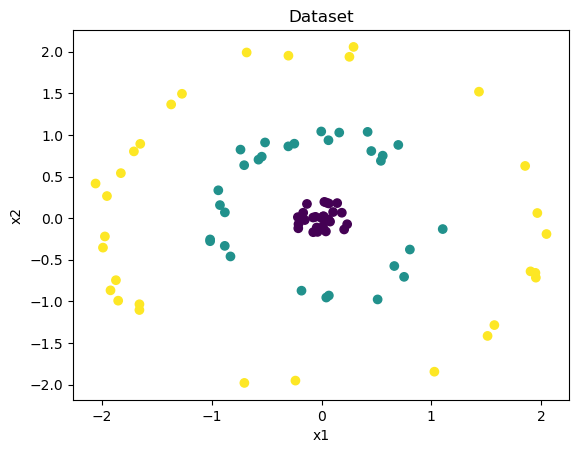

In [2]:
npt = 30
nClass = 3
delta = 1/4

theta = npr.rand(npt) * 2 * math.pi
r = npr.rand(npt)*delta 
dataX = np.vstack((r * np.cos(theta), r * np.sin(theta))).T
color = np.zeros(npt)
for i in range(nClass-1):
    theta = npr.rand(npt) * 2 * math.pi
    r = npr.rand(npt) * delta - delta / 2 +i+1
    Xtemp = np.vstack((r * np.cos(theta), r * np.sin(theta))).T
    dataX = np.vstack((dataX,Xtemp))
    color = np.concatenate((color, np.ones(npt) * (i+1)))

#plt.figure(num=None, figsize=(3, 2), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dataX[:,0], dataX[:,1], c = color)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Dataset')
#plt.savefig('../slides/pics/KPCA1.pdf') 



Text(0, 0.5, 'PC2')

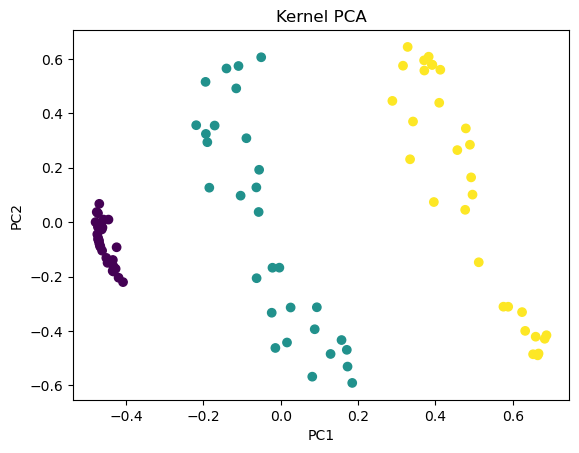

## Question 2: counting common substring.
The following code provides the function  `randomStrings` which generates random strings of size 30 over the alphabet made of letters `s`, `i`, `d`, `f`, `u`, `n`. We have two classes, the positive class with strings containing `sidfun` or `funsid`  as substrings. The negative class only contains strings which are taken uniformly at random over the space of strings. We will handle this dataset using pairwise comparison representation with a kernel which counts the number of common substrings between strings of a given size.



In [4]:
def randomStrings(stringLength=50,n0 = 100, n1 = 50, n2 = 50, s=1234):
    np.random.seed(s)
    random.seed(s)
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    letters = 'fsdinu'
    substring2 = 'sidfun'
    substring3 = 'funsid'
    strings1 = [''.join(random.choice(letters) for i in range(stringLength)) for j in range(n0)]
    strings2 = [''.join(random.choice(letters) for i in range(stringLength)) for j in range(n1)]
    strings3 = [''.join(random.choice(letters) for i in range(stringLength)) for j in range(n2)]
    for j in range(len(strings2)):
        zou = strings2[j]
        i = random.choice(range(len(zou) - len(substring2))) 
        zou = zou[0:i] + substring2 + zou[(i+len(substring2)):len(zou)] 
        strings2[j] = zou
    for j in range(len(strings3)):
        zou = strings3[j]
        i = random.choice(range(len(zou) - len(substring3))) 
        zou = zou[0:i] + substring3 + zou[(i+len(substring3)):len(zou)] 
        strings3[j] = zou
    strings = strings1 + strings2 + strings3
    strings = random.sample(strings, k=len(strings))
    y = [zou.count(substring2) + zou.count(substring3)  for zou in strings]
    y = np.array(y)
    y = y>0
    return strings, y


X,y = randomStrings()
X ## Display X

['dndsdsufiuufdsnnnsidfndnunndsinnifsffnussnfniuiund',
 'uidsidfunnnfsduiuduiififfsdssdninfunufnnuuinidsnid',
 'ifuifnfusnisddfsuifuisussdudfuddfussuusddnudifnund',
 'sdfduufndnduifinsffdsdinfussdsnfnsnndiisfsfddfdfii',
 'unnnufuidnssnniidiinfunudsddiunuisifdndsidfundinnu',
 'udnfffudidddniunusiifdnndudnsssniniindndiidunidsds',
 'dufnfnfufunsidfinfnifnifffinnifsuinuifusdifsiufdds',
 'niufiifndnfsfiddnniufuniusnninfniusnddsdifisiufsin',
 'ndfffssfnssuifnduuusnssudnfdsnsnuudisifunsidssnuud',
 'isinndundfinsfdiinniusnsnfissfidnnusidfunisdsnifii',
 'fuuinsnnisfnsunnnifsdsinnusudnddusffsdduufnnfffusi',
 'ufddsiusinusdiiiniissdsfndffinuusfdnsidfunnudsfddd',
 'isdifiuiudnisidfunnusunnudnidssudinfunusiudsidsnud',
 'usudnudusnfnufffsdsudsndfnnsdnsundfinnnddufdifdndn',
 'idsdisnnnissidfunuusuisnnsudnfsisdinsdunnififundsd',
 'usddfiffunsidffuususnidiifdsfuffidufuuusissfinddif',
 'diiunfunsidfunnfdfufininnddfsiussififisduuffufusfu',
 'dnfnuidisnffunsidnsifffuffusinsfiifuidssuiufifffsu',
 'ufsufdun

The following function compute the number of common substrings between two strings `a` and `b` of length at most `lenString`. 
- Read the code and try to understand this.
- Describe an explicit feature space representation for which `countCOmmonSubtring` is the usual scalar product.
- Deduce that this induces a family of positive definite kernels on the space of strings.
- What is the dimension of the feature space in general? For `lenString` = 6?

In [5]:
def countCommonSubstring(a, b, lenString = 4):
    z = 0
    for i in range(len(a) - lenString+1):
        tempStr = a[i:(i+lenString)]
        if a[0:(i+lenString-1)].count(tempStr) == 0:
            z += 1 * (b.count(tempStr)>0)
    return z

Provide the code to compute the Gram matrix of the dataset for substrings of size `6`.
- Verify that `K` is symmetric (use `K.T` to get `K` transposed).
- Verify that `K` is positive definite (use `np.linalg.eig`)

In [6]:
K = np.zeros((len(X), len(X)))


Shape of K:     (200, 200)
Distance between K and K tranpose:     0.0
Smalest eigenvalue of K:      13.092025927559206


## Question 2: Kernel PCA.

For $l = 2,3, \ldots, 8$, compute the corresponding kernel matrix $K^{(l)}$ which is given by counting the number of substrings of size $l$. Store these matrices in an $n \times n \times 7$ numpy array to avoid recomputing it all the time.

For $l = 2, 3, \ldots, 8$, perform kernel PCA and plot the first two components (use `decomposition.KernelPCA` from `sklearn` and its `fit_transform` method). Comment the result.

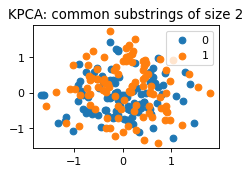

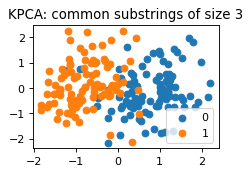

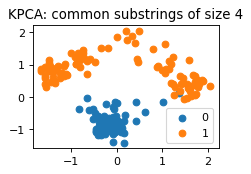

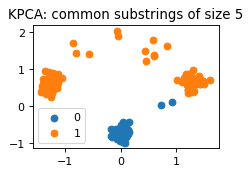

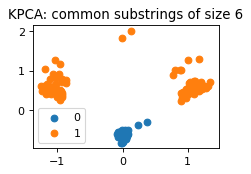

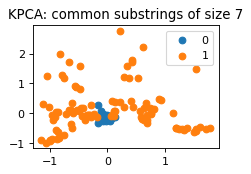

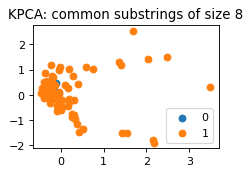

## Question 3
Implement question 1 and 2 without `sklearn` using only linear algebra.

/usr/lib/python3.10/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'KPCA (only linear algebra)')

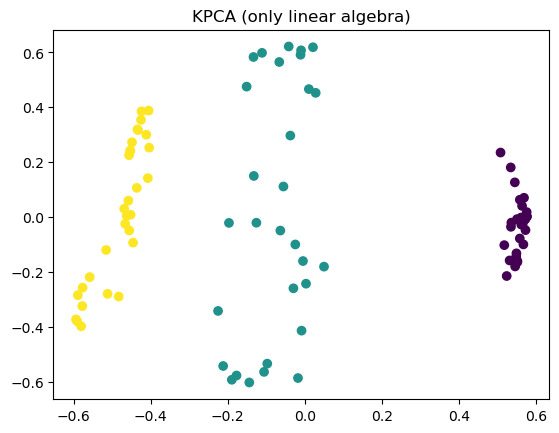

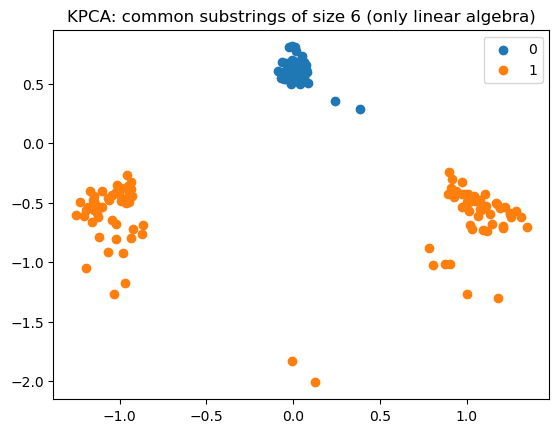

## Question 3: Support vector machine.
The following code generates a test set `Xtest`, `ytest` of size $n_{test}$ which is given from the same process as the training set.
For $l = 2,3, \ldots, 8$, the following code computes a test kernel matrix $K_{test}^{(l)}$ which is given by counting the number of substrings of size $l$ between all elements of the test set and all elements of the training set. These matrices are stored in an $n_{test} \times n \times 7$ numpy array to avoid recomputing it all the time.

In [11]:
Xtest,ytest = randomStrings(n0 = 200, n1 = 200,s=123)
Ktests = np.zeros((len(Xtest), len(X), nks))
for k in range(nks):
    for i in range(len(Xtest)):
        for j in range(len(X)):
            Ktests[i,j,k] = countCommonSubstring(Xtest[i], X[j], k+2)

For $l = 2,3, \ldots, 8$, the substring length and $C = 0.001, 0.01,0.1,1$ train a SVM on the training set `X`, `y` using precomputed training kernel matrices and evaluate the accuracy of the trained model on the test set using the precomputed test kernel matrices `Ktests`. Use `sklearn.svm.SVC`. For each value of `C` plot the test error as a function of $l$. Comment the results: which value of $l$ would you choose? Is 6 optimal? Can you explain this? How does it relate to the first questions? 

Regarding the evolution of the result with $C$, which value of $C$ would you recommend here an why?

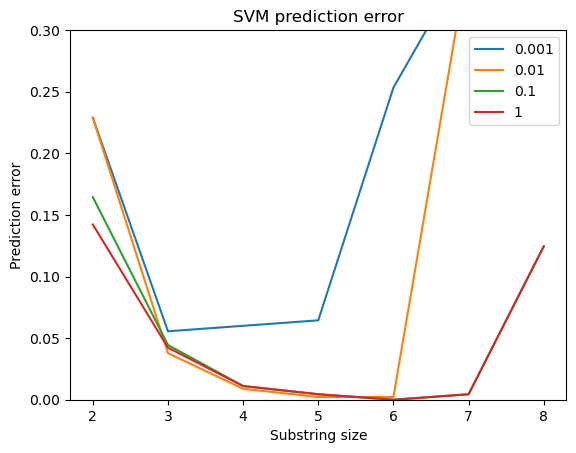

Try different random seeds and comment on the difference.